# Scalar Fields

The scalar fields class essentially implements class for functions over some $d$-dimensional vector space $\mathbb{R}^d$.  In physics these are scalar fields, which we want to study the dynamics of.  The scalar fields class implements a large suite of useful operations including various methods for approximating derivatives and integrals, computing topological invariants, imposing a dynamics and the algebra of functions.

A scalar field $\phi(x)$ is a function over some $d$-dimensional vector space $\mathbf{X} \subseteq \mathbb{R}^d$, whose points are written as $x \in \mathbf{X}$.  For most practical purposes, it is assumed that the scalar fields we are interested in belong to the subset of smooth functions over $\mathbf{X}$, i.e. $\phi(x) \in \Phi \subseteq C^{\infty}(\mathbf{X})$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Interpolator
from etraj.etraj import Vector, Matrix, UGrid, Interpolator, ScalarField
import etraj.etraj as et

## Constructors

In [2]:
# Basic constructor
S = ScalarField()

# summary information
print(S)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x5593c737d240>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffd2cb1d078>
---------------------------------------------------
   name: 'default'
    dim: 0
      N: 0
---------------------------------------------------
UGrid 'default' at: 0x5593c7c5ed00,
            ref at: 0x5593c737d2a0
Interpolator at: 0x5593c78664e0,
         ref at: 0x5593c737d2b0
Logger at: 0x5593c7c5ed00,
   ref at: 0x5593c737d2d0
++++++++++++++++++++++++++++++++++++++++++++++++++++


In [18]:
# Constructor with a UGrid
# create a uniformly random one-dimensional grid
# between -5 and 5 with N = 10000 points.
N = 500
x = np.random.uniform(-2*np.pi,2*np.pi,N)

# next, create the grid of microstates for this 
# set of points.
g = UGrid(x)

S = ScalarField('SField with grid',g)
print(S)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x5593c8115050>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffd2cb1d078>
---------------------------------------------------
   name: 'SField with grid'
    dim: 1
      N: 500
---------------------------------------------------
UGrid 'default' at: 0x5593c806c360,
            ref at: 0x5593c81150b0
Interpolator at: 0x5593c858f2c0,
         ref at: 0x5593c81150c0
Logger at: 0x5593c806c360,
   ref at: 0x5593c81150e0
++++++++++++++++++++++++++++++++++++++++++++++++++++


In [19]:
# Constructor with UGrid and field values
f = np.cos(x)

S = ScalarField('f(x) = cos(x)',g,f)
print(S)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x5593c737d240>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffd2cb1d078>
---------------------------------------------------
   name: 'f(x) = cos(x)'
    dim: 1
      N: 500
---------------------------------------------------
UGrid 'default' at: 0x5593c7c5ed00,
            ref at: 0x5593c737d2a0
Interpolator at: 0x5593c8598860,
         ref at: 0x5593c737d2b0
Logger at: 0x5593c7c5ed00,
   ref at: 0x5593c737d2d0
++++++++++++++++++++++++++++++++++++++++++++++++++++


## Attributes for scalar fields

In [20]:
# 

## The algebra of functions

The ScalarField class comes equipped with an assortment of operator overloads.  These include the standard addition and multiplication of two fields, as well as addition and multiplication by scalars.  The following gives some examples of the use of these operators.

Let's first take a look at a set of one-dimensional examples.

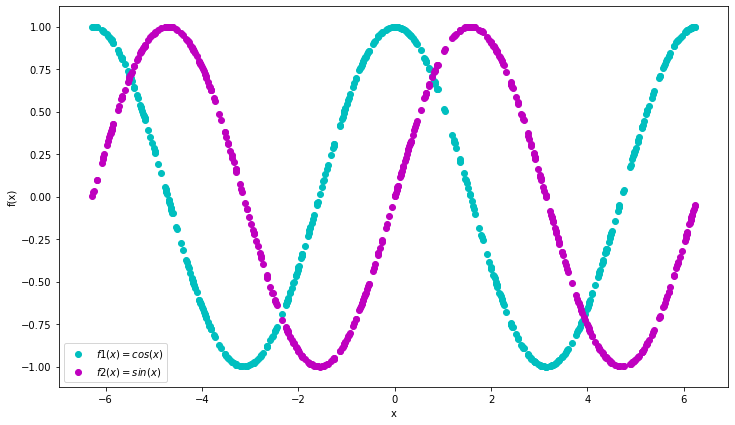

In [21]:
# Adding two scalar fields

# Two scalar fields over the same grid can be added
S1 = ScalarField('cos(x)',g,np.cos(x))
S2 = ScalarField('sin(x)',g,np.sin(x))

f1 = S1.get_field()
f2 = S2.get_field()

# Let's see what these two fields look like
fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=r'$f1(x)=cos(x)$')
axs.scatter(x,f2,color='m',label=r'$f2(x)=sin(x)$')
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [22]:
# Now let's add the two fields together
S3 = S1 + S2
print(S3)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x5593c7e8daa0>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffd2cb1d078>
---------------------------------------------------
   name: '(cos(x) + sin(x))'
    dim: 1
      N: 500
---------------------------------------------------
UGrid 'default' at: 0x5593c806c360,
            ref at: 0x5593c7e8db00
Interpolator at: 0x5593c7fa9800,
         ref at: 0x5593c7e8db10
Logger at: 0x5593c806c360,
   ref at: 0x5593c7e8db30
++++++++++++++++++++++++++++++++++++++++++++++++++++


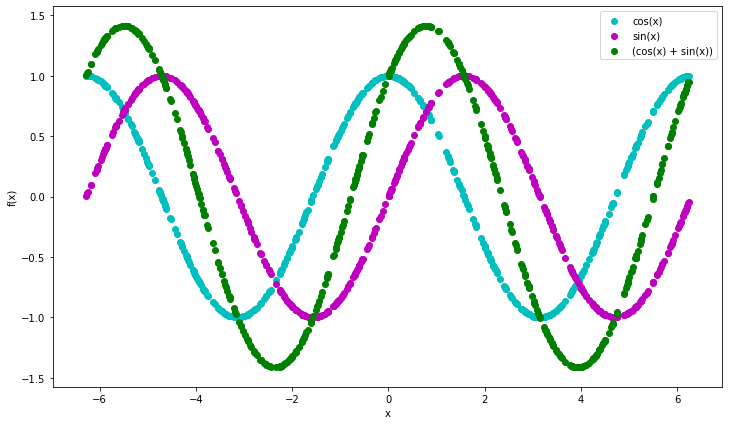

In [23]:
# The result is
f3 = S3.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f3,color='g',label=S3.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [24]:
# While it will not crash the program, manipulating 
# scalar fields with different underlying UGrids will lead
# to a warning and is not advised.
g1 = UGrid(x)
g2 = UGrid(x)

SG1 = ScalarField('SG1',g1,np.cos(x))
SG2 = ScalarField('SG2',g2,np.sin(x))

SG1 += SG2
print(SG1)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x5593c7fee620>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffd2cb1d078>
---------------------------------------------------
   name: '(SG1 + SG2)'
    dim: 1
      N: 500
---------------------------------------------------
UGrid 'default' at: 0x5593c8581780,
            ref at: 0x5593c7fee680
Interpolator at: 0x5593c83eb920,
         ref at: 0x5593c7fee690
Logger at: 0x5593c8581780,
   ref at: 0x5593c7fee6b0
++++++++++++++++++++++++++++++++++++++++++++++++++++


In [25]:
SG1.output()

[20:09:02] [trace] ET:ScalarField:SG2_0: Scalar Field 'SG2' created at location 0x5593c7f8a140
[20:09:02] [trace] ET:ScalarField:SG2_0: Interpolator 'default' created at location 0x5593c7ff7040
[20:09:02] [info] ET:ScalarField:SG2_0: Logger passed to Interpolator 'def[20:09[20:09:02] [warning] ET:ScalarField:SG1_0: UGrids for scalar fields SG1 and SG2 do not match
09:02] [trace] ET:ScalarField:SG2: Interpolator 'default' destroyed at location 0x5593c7e9ecf0



In [26]:
# Subtraction works in the same way
S4 = S1 - S2
print(S4)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x5593c7f7c240>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffd2cb1d078>
---------------------------------------------------
   name: '(cos(x) - sin(x))'
    dim: 1
      N: 500
---------------------------------------------------
UGrid 'default' at: 0x5593c806c360,
            ref at: 0x5593c7f7c2a0
Interpolator at: 0x5593c7e9ecf0,
         ref at: 0x5593c7f7c2b0
Logger at: 0x5593c806c360,
   ref at: 0x5593c7f7c2d0
++++++++++++++++++++++++++++++++++++++++++++++++++++


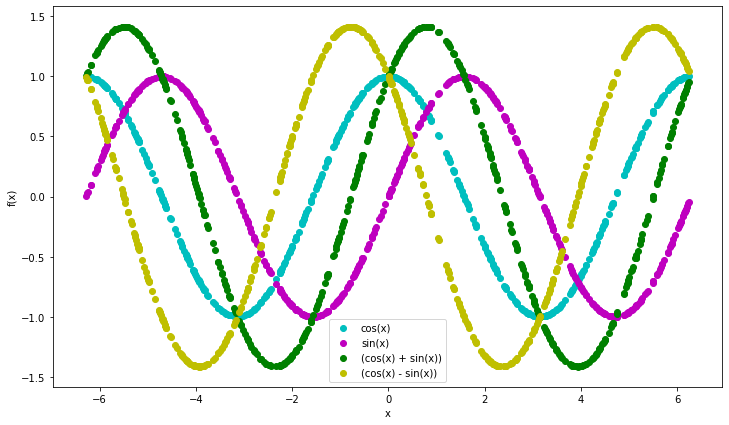

In [27]:
# The result is
f4 = S4.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f3,color='g',label=S3.get_name())
axs.scatter(x,f4,color='y',label=S4.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [28]:
# We can also multiply two scalar fields
S5 = S1 * S2
print(S5)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x5593c7f397d0>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffd2cb1d078>
---------------------------------------------------
   name: '(cos(x) * sin(x))'
    dim: 1
      N: 500
---------------------------------------------------
UGrid 'default' at: 0x5593c806c360,
            ref at: 0x5593c7f39830
Interpolator at: 0x5593c7e9ed80,
         ref at: 0x5593c7f39840
Logger at: 0x5593c806c360,
   ref at: 0x5593c7f39860
++++++++++++++++++++++++++++++++++++++++++++++++++++


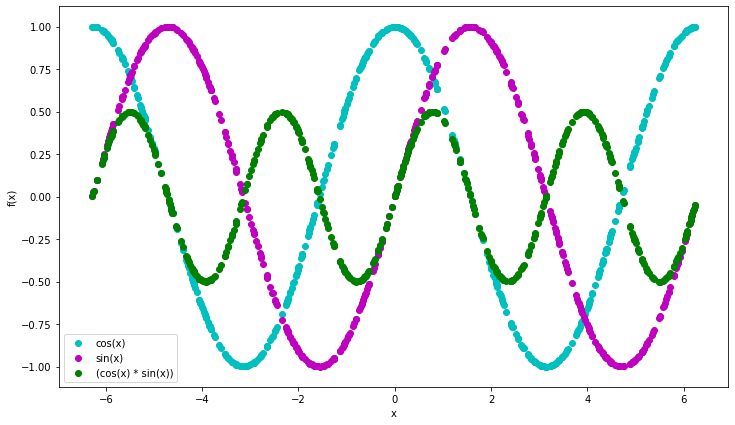

In [29]:
# The result is
f5 = S5.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f5,color='g',label=S5.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [30]:
# We can also divide two scalar fields whenever
# their functional form does not cross f(x) = 0.
x = np.random.uniform(0,1,N)
g = UGrid(x)

SD1 = ScalarField('2.0',g,[2.0 for i in range(len(x))])
SD2 = ScalarField('exp(x)',g,np.exp(x))
SD3 = SD1 / SD2
print(SD3)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x5593c7edecb0>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffd2cb1d078>
---------------------------------------------------
   name: '(2.0 / exp(x))'
    dim: 1
      N: 500
---------------------------------------------------
UGrid 'default' at: 0x5593c810b0a0,
            ref at: 0x5593c7eded10
Interpolator at: 0x5593c853a540,
         ref at: 0x5593c7eded20
Logger at: 0x5593c810b0a0,
   ref at: 0x5593c7eded40
++++++++++++++++++++++++++++++++++++++++++++++++++++


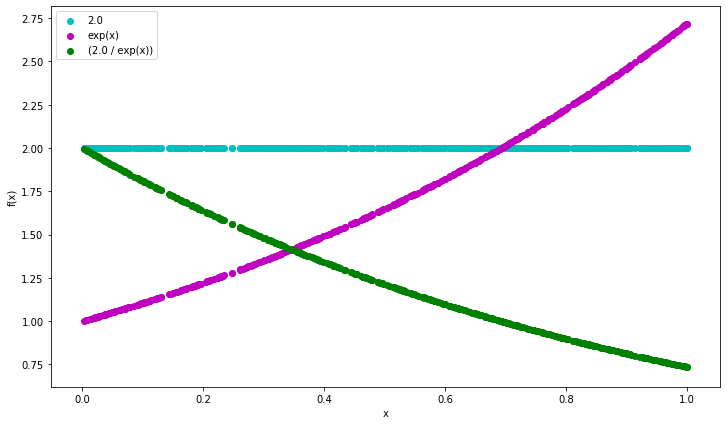

In [31]:
# The result is
fd1 = SD1.get_field()
fd2 = SD2.get_field()
fd3 = SD3.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,fd1,color='c',label=SD1.get_name())
axs.scatter(x,fd2,color='m',label=SD2.get_name())
axs.scatter(x,fd3,color='g',label=SD3.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

## Calculus over scalar fields

## Integration

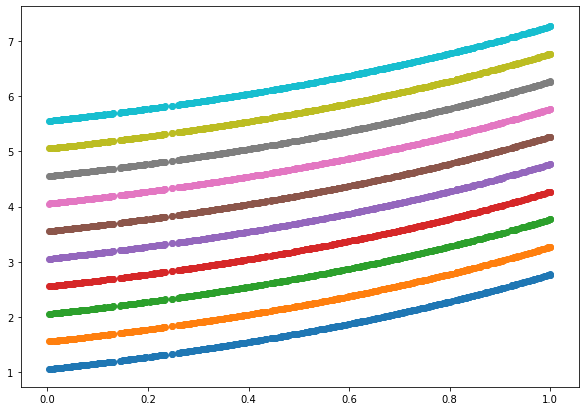

In [37]:
# first import the integrator
from etraj.etraj import Integrator
fig,axs = plt.subplots(figsize=(10,7))
for i in range(100):
    SD2.get_integrator().scalar_RK4_step(g,SD2,0.1)
    if i % 10 == 0:
        axs.scatter(x,SD2.get_field())